In [1]:
import pandas as pd


### Problem definition and approach
The objective is to help the client figure out whether the "member-get-member" (mgm) scheme is "good". First we need to define what "good" means. In raw financial terms, it means that the money spent on vouchers in acquiring new members through the mgm scheme was a justified investment. 

Usually the metric used to assess such a marketing investment is:  
    
`Customer lifetime value (LTV) - Customer acquisition cost(CAC)`

If the figure is greater than 0, then the investment is considered worth it. 

`LTV` is usually defined as the revenue earned from the customer during their lifetime. Assuming this is a 1P delivery business (eg. Deliveroo) where the delivery service keeps, say, 20% of the bill and pays for the rider, the `LTV` can be defined as   

`number of orders over lifetime x average order size x 20%`

However, a more rational way to assess the lifetime value is to use gross-profit instead of revenue with the cost of sales being rider cost. Typically, that figure for food delivery companies is 15%. So we modifiy our definition of `LTV` to 

`number of orders over lifetime x average order size x 20% x 15%`

Next, assuming that customer lifespan = 10 years and that the observed average 6 monthly orders pattern persists over the rest of the lifetime we can change the formula to 

`6 month cumulative orders x 20 x average order size x 20% x 15%`

This figure might overvalue the LTV since the amount earned is spread over ten years and therefore does not take into account time value of money. On the other hand, this does not take into account any inflation in the order value over time. We can take both these into account by assuming a real interest rate of, say, 3%. With that assumption, an inflated pound earned every year for the next ten years is worth 8.8 pounds today. So we can use this formula to simplify the LTV calculation:

`(6 month cumulative orders x average order size x 2) x 20% x 15% x 8.78`

`CAC` in this case is simply 2x the voucher amount (assuming no other direct marketing expenses).






First, let's load the data, remove the records where mgm is NaN or 0 to get `mgm_df`

In [7]:
df = pd.read_csv("assignment-docs/Sample Data - Case Study.csv")
nn_df = df[df["member_get_member_viral"].notnull()]
total = df.shape[0]
mgm_df = df[df["member_get_member_viral"]==1]

print(mgm_df.shape)

(356, 14)


We see that we have only 356 records to play with. So, let's construct a dataframe using which we can calculate the metrics we need to make our decision.

In [14]:
analysis_df = mgm_df[["most_used_city","voucher_amount", "average_order_value",  "cnt_orders_6m_fwd"]]

In [22]:
#`(6 month cumulative orders x average order size x 2) x 20% x 15% x 8.78`
analysis_df["LTV"] = analysis_df["cnt_orders_6m_fwd"]*analysis_df["average_order_value"]*0.2*0.15*8.78
analysis_df["LTV - CAC"] = analysis_df["LTV"] - 2*analysis_df["voucher_amount"]

/tmp/ipykernel_258424/376937833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df["LTV"] = analysis_df["cnt_orders_6m_fwd"]*analysis_df["average_order_value"]*0.2*0.15*8.78


In [25]:
analysis_df


,most_used_city,voucher_amount,average_order_value,cnt_orders_6m_fwd,life_time_revenue,LTV,LTV - CAC
2,Manchester,10.0,35.28,1,141.12,9.292752,-10.707248
176,London,10.0,19.02,1,76.08,5.009868,-14.990132
205,London,10.0,30.00,1,120.00,7.902000,-12.098000
213,London,10.0,18.36,1,73.44,4.836024,-15.163976
222,Manchester,10.0,21.54,1,86.16,5.673636,-14.326364
...,...,...,...,...,...,...,...
24626,London,10.0,27.06,2,216.48,14.255208,-5.744792
24648,London,10.0,74.52,1,298.08,19.628568,-0.371432
24768,London,10.0,25.80,1,103.20,6.795720,-13.204280
24792,London,10.0,19.20,1,76.80,5.057280,-14.942720


As we can see from the histogram below, the vast majority of the mgm customer acquisitions result in negative vallue. 

<AxesSubplot:>

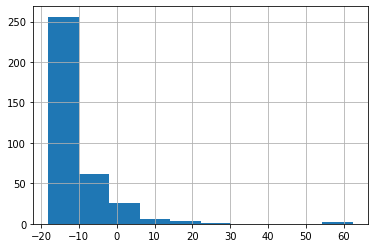

In [26]:
analysis_df["LTV - CAC"].hist()

we can also assess that analytically:

In [36]:
num_profitable_mgm = analysis_df[analysis_df["LTV - CAC"]>0].shape[0]
print(f"number of profitable MGMs:\t{num_profitable_mgm} out of a total of {analysis_df.shape[0]}")


number of profitable MGMs:	25 out of a total of 356


#### Strategic considerations
While the method I've described is a sensible way to go about assessing whether the scheme is worth it, sometimes there might be strategic reasons why the client might want to proceed with it despite it being unprofitable on the face of it. For example, they might want to make life difficult for a competitor. Or they might want to onboard customers so that they could cross-sell other services (eg. Uber Eats and Uber).


#### Further analysis
The lowest hanging fruit is to use a classifier predict which customer is likel to refer profitable new users. One could even look at the various cities separately and see if some markets result in more profitable mgm schemes. 